<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

2.1 Budget vs Gross

2.2 Genre vs. Gross

2.3 Others: Source, Creative Type, Production Method vs. Gross

2.4 Runtime vs. Gross

2.5 Release time vs. Gross

2.6 Others: Director, Writer, Critic, Publisher vs. Gross

2.7 Popularity / Words of Mouth:

**3. Actionable Insights**

**4. Conclusion and Future Work**

4.1  Summary of Findings

4.2  Actionable Insights

4.3  Future Works

# **1. INTRODUCTION**

## **1.1 Business Statement**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired a team of data scientist from Flatiron to help them better understand the movie industry. The team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. The team must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

What makes a movie succesful and how do we create the next blockbuster movie that can return the highest ROI possible?


# **2. DATA VISUALIZATION**

## Display the full dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

/Users/baotramduong8/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [268]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [269]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

### Production Budget 

In [270]:
#production_budget distribution
y_values = full_df['production_budget'].sort_values(ascending=False)
x_values = y_values.index

#remove scientific notation
y_values.describe().apply(lambda x: format(x, 'f'))

count          625.000000
mean      68150400.000000
std       61668116.871375
min         100000.000000
25%       24000000.000000
50%       45000000.000000
75%       95000000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [271]:
#check to see top 20 movies costs the most
top_20_budget = full_df[['movie', 'production_budget']].sort_values(by = 'production_budget', ascending = False)[:20]
top_20_budget

,movie,production_budget
0,Avengers: Age of Ultron,365000000
3,Spectre,300000000
1,Avengers: Infinity War,300000000
2,Justice League,300000000
5,Solo: A Star Wars Story,275000000
6,John Carter,263700000
9,Batman v Superman: Dawn of Justice,263000000
7,Tangled,260000000
8,Captain America: Civil War,250000000
11,The Hobbit: The Desolation of Smaug,250000000


Text(0.5, 0, 'Production Budget in Millions')

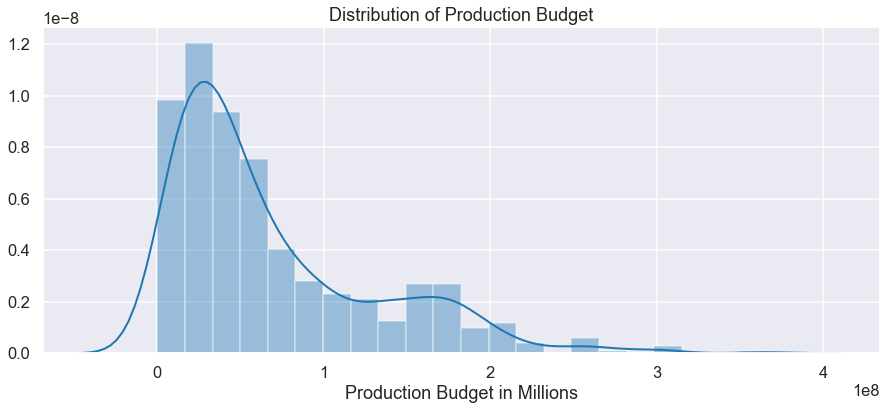

In [272]:
#plot
plt.figure(figsize = (15, 6))
sns.distplot(full_df['production_budget'])

#set labels
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget in Millions')

### Distribution of Profit

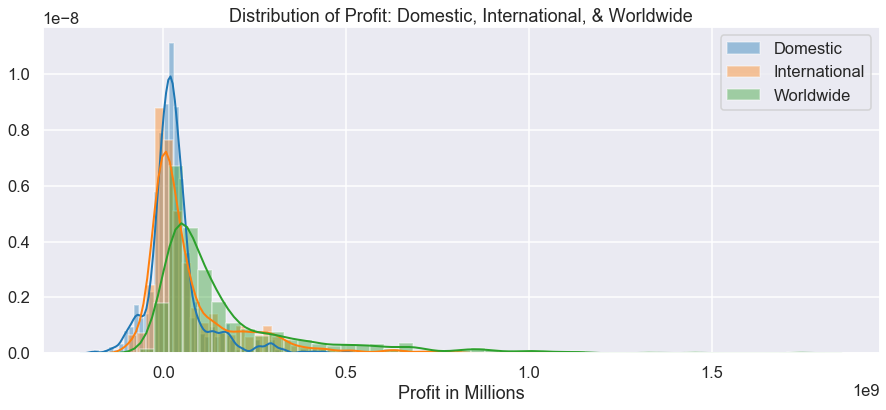

In [273]:
#plot
plt.figure(figsize = (15, 6))
sns.distplot(full_df['domestic_profit'], label = 'Domestic')
sns.distplot(full_df['international_profit'], label = 'International')
sns.distplot(full_df['worldwide_profit'], label = 'Worldwide')

#set labels
plt.legend()
plt.title('Distribution of Profit: Domestic, International, & Worldwide')
plt.xlabel('Profit in Millions')

#show
plt.show()

In [274]:
#save
fig.savefig('profit_distribution.png')

In [275]:
#check to see top 20 movies generated the highest profit
top_20_profit = full_df[['movie', 'worldwide_profit', 'domestic_profit', 'international_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:20]
top_20_profit

,movie,worldwide_profit,domestic_profit,international_profit
1,Avengers: Infinity War,1744540523,378815482,1065725041
16,Jurassic World,1454943967,437270625,802673342
31,Furious 7,1327179709,163007020,974172689
59,Jurassic World: Fallen Kingdom,1138334005,247719760,720614245
21,Black Panther,1136498912,500059566,436439346
206,Minions,1085631140,262045770,749585370
22,Incredibles 2,1042805359,408581744,434223615
0,Avengers: Age of Ultron,1031099202,94005868,572093334
25,Iron Man 3,1015392272,208992272,606400000
12,The Fate of the Furious,986703796,-24235235,760939031


Comparing top_20_budget movies and top_20_profit movies, they are not the same list. Only 8 out of 20 top_budget movies made it into top_profit list. So higher investment into production does not necessarily always mean higher profit. 

### Profit

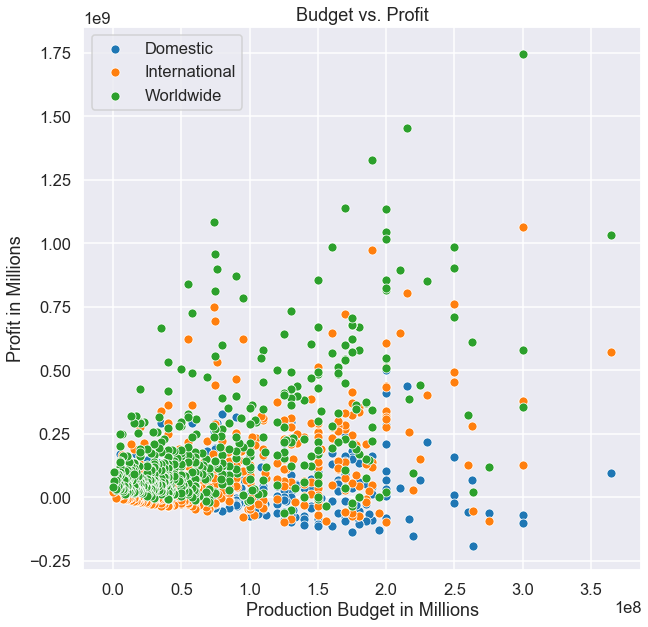

In [276]:
#plot
plt.figure(figsize = (10, 10))
ax1 = sns.scatterplot(x = full_df['production_budget'], y = full_df['domestic_profit'], 
                      label = 'Domestic')
ax2 = sns.scatterplot(x = full_df['production_budget'], y = full_df['international_profit'],
                     label = 'International')
ax3 = sns.scatterplot(x = full_df['production_budget'], y = full_df['worldwide_profit'],
                     label = 'Worldwide')

#set labels
plt.legend()
plt.title('Budget vs. Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Profit in Millions')

#show
plt.show()

In [277]:
#save
fig.savefig('budget_vs_profit.png')

We are interested in worldwide_profit and worldwide_profit_margin as this reflect the total profit earned. If we have more time, we can analyze each of the attribute with profit generated domestically vs. internationally to see if a movie performs better domestically than internationally and vice versa and why that is.

### Production Budget vs. Profit

Examine how Production Budget performs

In [287]:
#create sub dataframe for budget_range and worldwide_profit
budget_vs_profit = full_df[['budget_range', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)
budget_vs_profit.head()

,budget_range,worldwide_profit
1,>200M,1744540523
16,>200M,1454943967
31,100-200M,1327179709
59,100-200M,1138334005
21,100-200M,1136498912


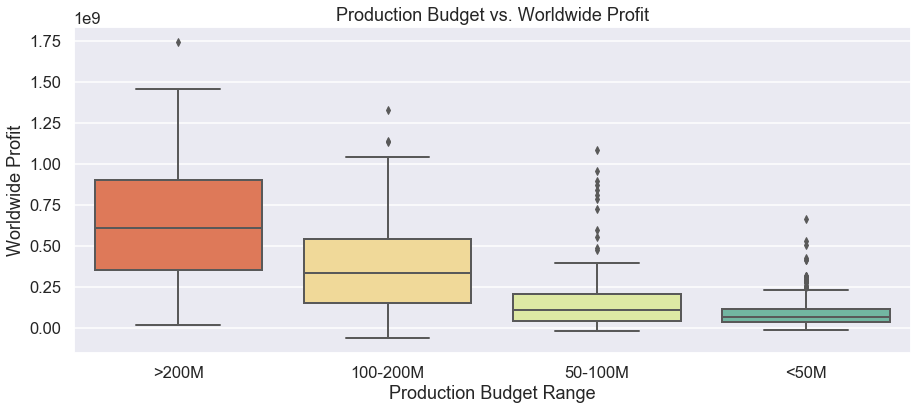

In [288]:
#set values
x = budget_vs_profit['budget_range']
y = budget_vs_profit['worldwide_profit']

#plot budget_range vs. worldwide_profit
plt.figure(figsize = (15, 6))
sns.boxplot(x, y, palette = 'Spectral')

#set labels
plt.title('Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget Range')
plt.ylabel('Worldwide Profit')

#show
plt.show()

From the boxplot, although the majority of the movies fall within the pattern of higher production budget = higher worldwide profit, we observe that movies in the <50M and 50M-100M budget_range contain a lot of outliers that outperformed those in 100-200M and up.

Let's only look at the top 100 performers:

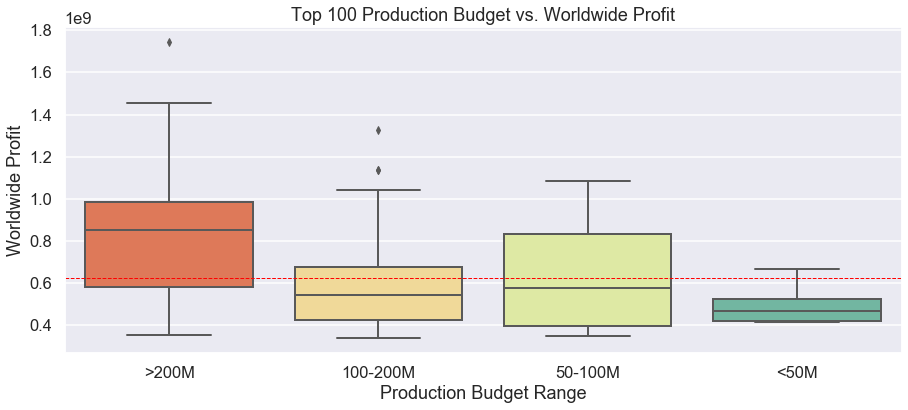

In [306]:
#do analysis on top_100 worldwide profit
top_100_profit = full_df[['budget_range', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]

#set values
x = top_100_profit['budget_range']
y = top_100_profit['worldwide_profit']

#plot budget_range vs. worldwide_profit
plt.figure(figsize = (15, 6))
sns.boxplot(x, y, palette = 'Spectral')
plt.axhline(top_100_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Top 100 Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget Range')
plt.ylabel('Worldwide Profit')

#show
plt.show()

In [307]:
#save 
fig.savefig('top_100_budget_vs_profit.png')

This second analysis reaffirms to us once again that higher investment does not always generate higher ROI as 100-200M movies is outperformed by 50-100M. We recommend that our production budget for our future to be in this range (50-100M).

## Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

### Distribution of Genre

In [93]:
#genre_distribution values
y_values = full_df['genre'].value_counts(ascending=False)
x_values = y_values.index

y_values

Adventure              129
Comedy                 107
Action                 103
Drama                   96
Thriller/Suspense       81
Horror                  56
Romantic Comedy         22
Black Comedy            12
Musical                 11
Western                  5
Concert/Performance      3
Name: genre, dtype: int64

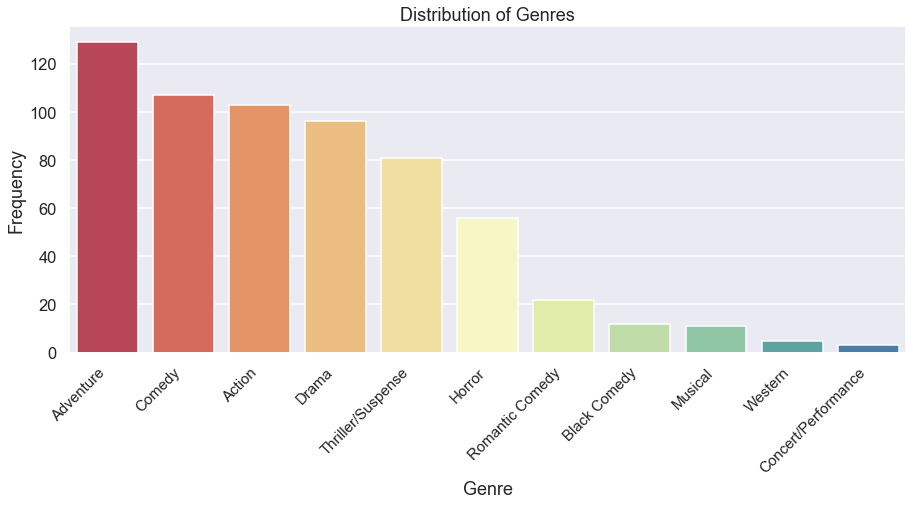

In [94]:
#plot
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation=45, ha='right', fontsize = 15)

#show
plt.show()

In [95]:
#save
fig.savefig("genre_distribution.png")

We see that Adventure, Comedy and Action are the most popular genres. Let's see the reason behind this. Is this because these genres generate the most profit?

In [319]:
#create sub dataframe genres vs. worldwide_profit of top 100 performers
genre_vs_profit = full_df[['genre', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
genre_vs_profit.head()

,genre,worldwide_profit
1,Action,1744540523
16,Action,1454943967
31,Action,1327179709
59,Action,1138334005
21,Action,1136498912


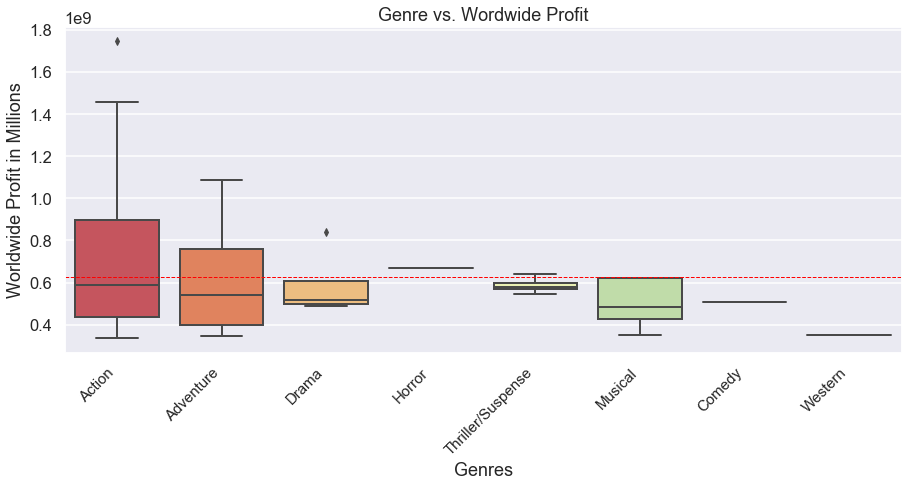

In [330]:
#plot Genre vs. Worldwide Profit
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_profit['genre'], y = genre_vs_profit['worldwide_profit'], palette = 'Spectral')
plt.axhline(genre_vs_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genre vs. Wordwide Profit')
plt.xlabel('Genres')
plt.ylabel('Worldwide Profit in Millions')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [332]:
#save
fig.savefig('genre_vs_profit')

Indeed, they do, especially Action and Adventure. Let's next investigate if their high profitability is correlated with their production budget.

In [323]:
#create sub dataframe genres vs. production_budget
genre_vs_budget = full_df[['genre', 'production_budget']].sort_values(by = 'production_budget', ascending = False)
genre_vs_budget.head()

,genre,production_budget
0,Action,365000000
3,Action,300000000
1,Action,300000000
2,Action,300000000
5,Adventure,275000000


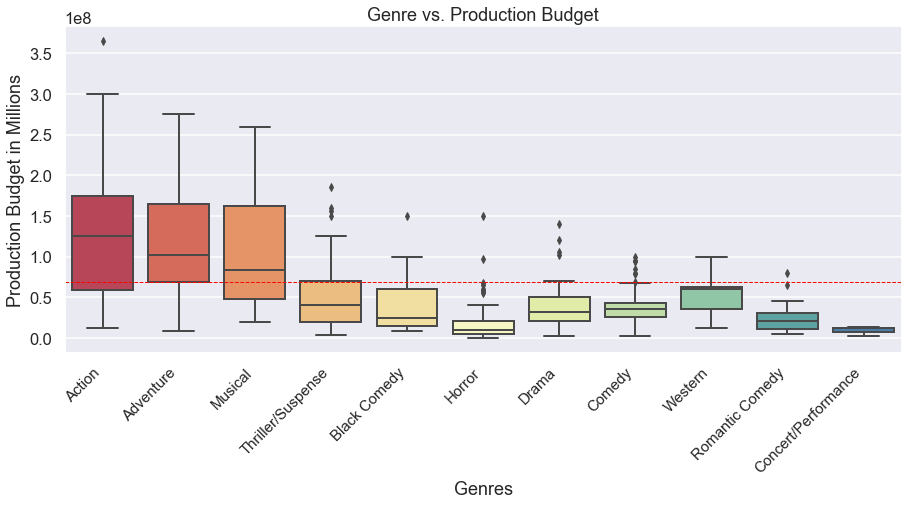

In [331]:
#plot Genre vs. Worldwide Profit
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_budget['genre'], y = genre_vs_budget['production_budget'], palette = 'Spectral')
plt.axhline(genre_vs_budget['production_budget'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genre vs. Production Budget')
plt.xlabel('Genres')
plt.ylabel('Production Budget in Millions')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [333]:
#save
fig.savefig('genre_vs_budget')

We see that Action, Adventure are the most lucrative genres but also costs much more to create. 

Now we are taking a look at Source, Creative Type, Production Method in correlation with Profit. Let's look at the distribution of each of these.

### Distribution of Source

In [96]:
#source_distribution values
y_values = full_df['source'].value_counts(ascending=False)
x_values = y_values.index

y_values

Original Screenplay                    308
Based on Fiction Book/Short Story      105
Based on Comic/Graphic Novel            45
Based on Real Life Events               42
Based on Factual Book/Article           33
Based on TV                             22
Based on Folk Tale/Legend/Fairytale     17
Remake                                  11
Based on Short Film                     11
Based on Game                           11
Spin-Off                                 9
Based on Religious Text                  4
Based on Play                            3
Based on Musical or Opera                2
Based on Toy                             2
Name: source, dtype: int64

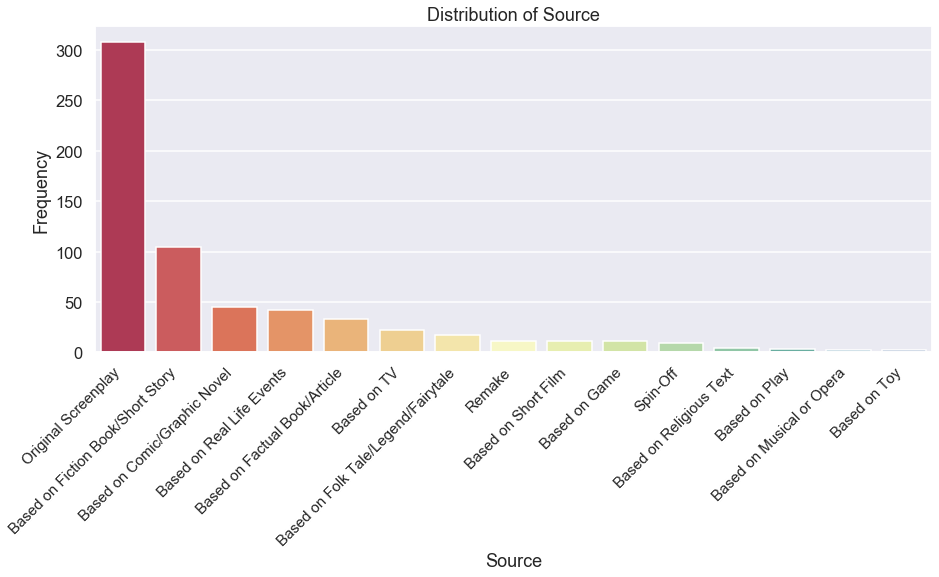

In [97]:
#plot source_distribution
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)
#show
plt.show()

In [98]:
#save
fig.savefig('source_distribution')

### Distribution of Creative Type

In [99]:
#creative_type values
y_values = full_df['creative_type'].value_counts(ascending = False)
x_values = y_values.index

y_values

Contemporary Fiction       289
Kids Fiction                73
Science Fiction             66
Dramatization               60
Fantasy                     58
Historical Fiction          42
Super Hero                  33
Factual                      3
Multiple Creative Types      1
Name: creative_type, dtype: int64

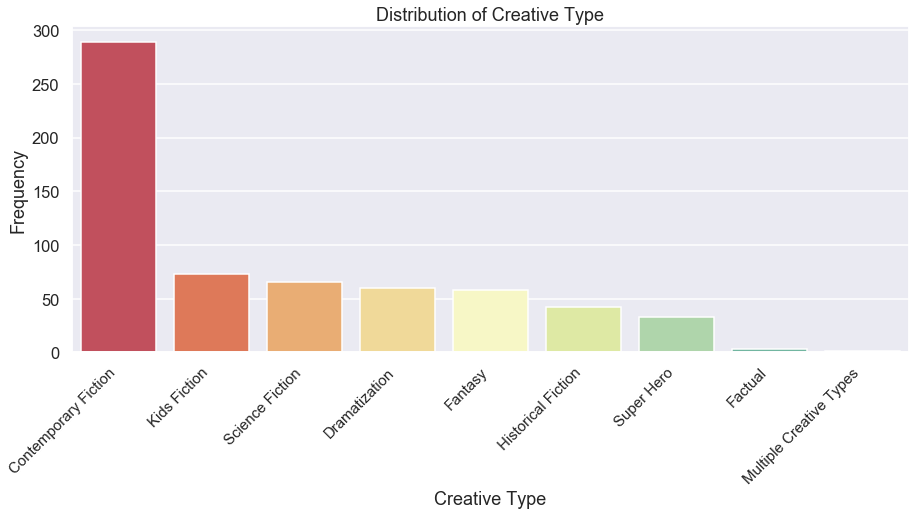

In [103]:
#plot
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette='Spectral')
plt.title('Distribution of Creative Type')
plt.xlabel('Creative Type')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [104]:
#save
fig.savefig('creative_type_distribution.png')

### Distribution of Production Method

In [119]:
#production_method_distribution values
y_values = full_df['production_method'].value_counts(ascending = False)
x_values = y_values.index

y_values

Live Action              513
Digital Animation         57
Animation/Live Action     51
Stop-Motion Animation      4
Name: production_method, dtype: int64

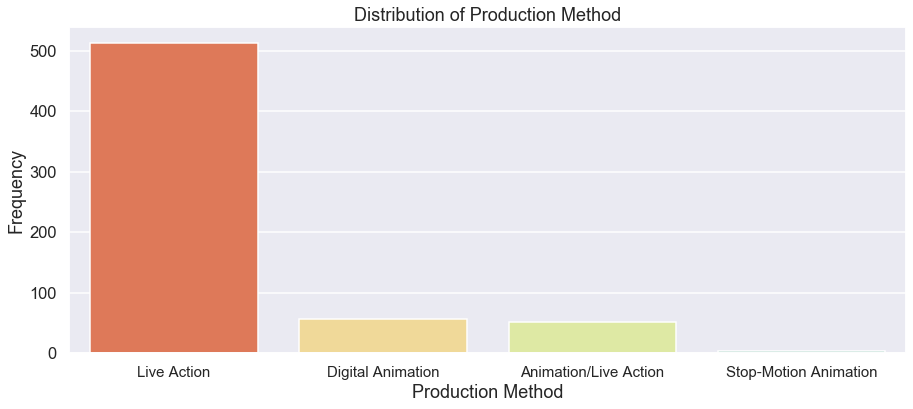

In [122]:
#plot
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = 'Spectral')
plt.title('Distribution of Production Method')
plt.xlabel('Production Method')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [123]:
#save
fig.savefig('production_method_distribution.png')

## Question 3: When is the best time of year to release a movie, in term of month and day of the week?

To answer this question, let's look at Release Time

Let's look at how these movie perform at different lease months:

## Question 4: Can popularity or words of mouth, in term of rating and number of votes, affect the performance of a movie?

Let's look at Rating, Number of Votes (num_votes), and also Studio (studio):

## Question 5: Is runtime a factor in determining the success of a movie?

Finally, let's look at Runtime (runtime_minutes)

## Extra: Is there one single best studio?

In [106]:
#studio_distribution values
y_values = full_df['studio'].value_counts(ascending=False)[:10]
x_values = y_values.index

y_values

Uni.       97
Fox        87
WB         72
BV         56
Par.       50
Sony       50
WB (NL)    40
LGF        32
LG/S       19
SGem       17
Name: studio, dtype: int64

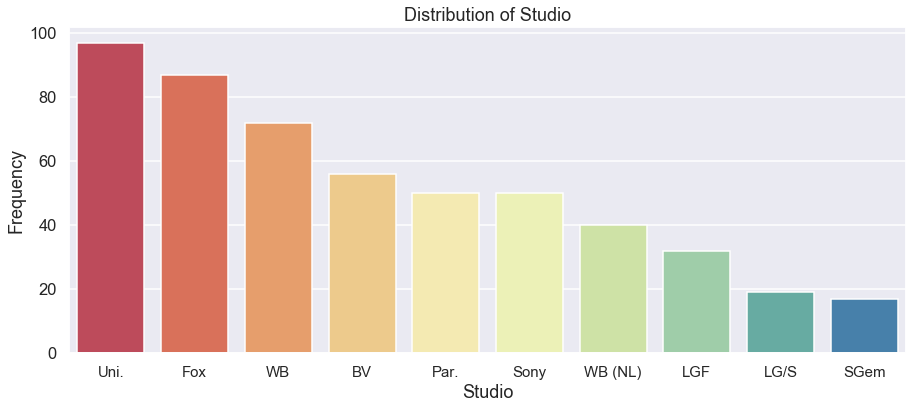

In [112]:
#plot
plt.figure(figsize = (15, 6))
sns.barplot(x_values, y_values, palette = "Spectral")
plt.title('Distribution of Studio')
plt.xlabel('Studio')
plt.ylabel('Frequency')

#fix xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [113]:
#save
fig.savefig('studio_distribution.png')

Universal Studio, Fox and Warner Bros are the 3 most popular studios. Is this because they can create the most profitable movies? 

In [344]:
#create sub dataframe for studio and worldwide_profit
studio_vs_profit = full_df[['studio', 'worldwide_profit']].sort_values(by = 'worldwide_profit', ascending = False)[:100]
studio_vs_profit.head()

,studio,worldwide_profit
1,BV,1744540523
16,Uni.,1454943967
31,Uni.,1327179709
59,Uni.,1138334005
21,BV,1136498912


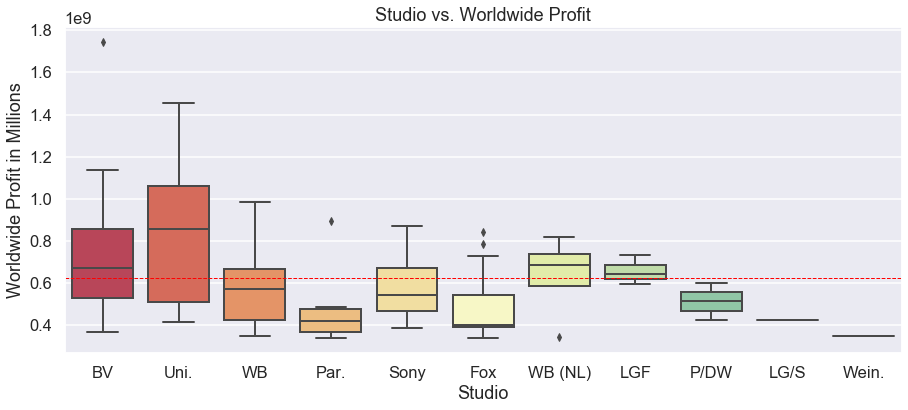

In [347]:
#plot studio vs. worldwide_profit
plt.figure(figsize = (15, 6))
sns.boxplot(x = studio_vs_profit['studio'], y = studio_vs_profit['worldwide_profit'], palette = 'Spectral')
plt.axhline(studio_vs_profit['worldwide_profit'].mean(), ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Studio vs. Worldwide Profit')
plt.xlabel('Studio')
plt.ylabel('Worldwide Profit in Millions')

#show
plt.show()

Looks like Universal Studio is our winner.

## Extra: What is the most popular language?

In [114]:
#language_distribution
y_values = full_df['language'].value_counts(ascending = False)
x_values = y_values.index

y_values #looks like there is only one

en    625
Name: language, dtype: int64

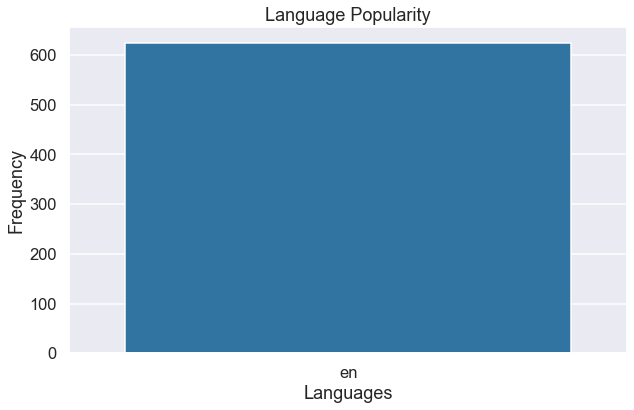

In [116]:
#plot
plt.figure(figsize = (10,6))
sns.barplot(x_values, y_values)
plt.title('Language Popularity')
plt.xlabel('Languages')
plt.ylabel('Frequency')

#show
plt.show()

This is not very interesting to look at but makes sense. English is the primary language as all the movies we used were made in the US.

# 3. ACTIONABLE INSIGHTS

# **4. CONCLUSION & FUTURE WORKS**

**Future works:**

There are other factors such as star quality, quality of script, special effects, marketing campaign, popularity of the film preceding it (if it's a sequel), competition or lack thereof, competition from non-movie events such as weather or news and sport events. 

Director and writer are also interesting to look at.

Movie researchers has also found that critics have a dual role, where they both influence consumers' movie choice and predict box office performance by reflecting moviegoers' tastes. Unfortunately we won't be investigating these features as they will take up extra time and are all outside the scope of this project.